# Plot validator curves with pkl objects
Loading pkl objects for vsl and novsl to plot the validator results of the first run with the unfitted intervals.

ValueError: x and y must be the same size

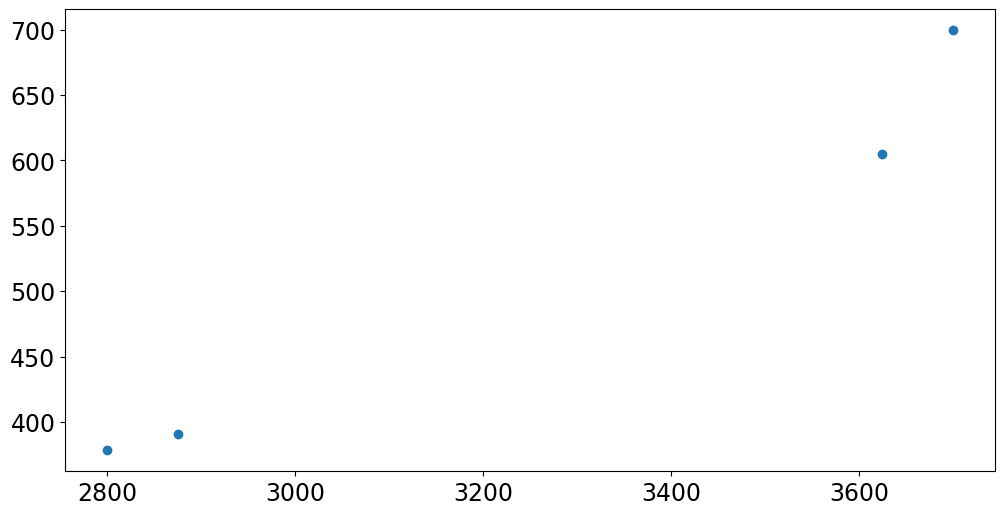

In [1]:
import matplotlib
import os
os.environ['INSTANCE_NAME'] = 'VSL'

from global_settings import vfs
import pickle
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
# vsl = validator_controller_vsl
# nvsl = validator_controller_novsl
import datetime
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Uncomment to read the validator_controller object from file to plot curves
# Figures for the paper
vsl = pickle.load(open("vsl-example.pkl", "rb"))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


plt.rcParams.update({'font.size': 17})

# Plot for vsl
#for controller in [validator_controller_vsl,validator_controller_novsl]:
# controller= validator_controller_novsl
#    print(f"X values and Y values {controller.x_values}{controller.y_values} predicted values {controller.predicted_values}")
#    plt.scatter(controller.x_values, controller.y_values, label=f'Original Data ')
#    plt.scatter(controller.x_values, controller.predicted_values, label=f'Predicted y Data ', marker='x')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1], color='red', label=f'Polynomial Regression')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
#    plt.plot(controller.fitted_curve[2], controller.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

plt.scatter(vsl.x_values, vsl.y_values, label=f'Original Data ')
plt.scatter(vsl.x_values, vsl.predicted_values, label=f'Predicted y Data ', marker='x')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1], color='red', label=f'Polynomial Regression')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
plt.plot(vsl.fitted_curve[2], vsl.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')

# plt.scatter(nvsl.x_values, nvsl.y_values, label=f'Original Data ')
# plt.scatter(nvsl.x_values, nvsl.predicted_values, label=f'Predicted y Data ', marker='x')
# plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1], color='blue', label=f'Polynomial Regression novsl')
#plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1] + vfs["threshold_y_fitting"], color='black', label=f'threshold ')
#plt.plot(nvsl.fitted_curve[2], nvsl.fitted_curve[1] - vfs["threshold_y_fitting"], color='black', label=f'threshold ')
count = 0
for start, end in vsl.unfit_interval:
    count += 1
    plt.axvspan(start, end, color='orange',alpha=0.3, label=f'Unfit Interval {count}: [ {round(start)},{round(end)} ]')


plt.xlabel('Traffic volume [veh/h]')
plt.ylabel('TTS [veh$\cdot$h]')
plt.title(f'Fitted Curve with unfit Intervals for VSL')
plt.legend()
#plt.show()
plt.savefig(f"Figure1-{timestamp}.pdf", format='pdf')

In [9]:
vsl.x_values

# Overall figure of the final functions
Plotted for the VSL and NOVSL to one graph.

In [2]:
import pickle
# Load the pickle files for threshold 15
vsl_total = pickle.load(open("logger-vsl.pkl", "rb"))
novsl_total = pickle.load(open("logger-novsl.pkl", "rb"))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


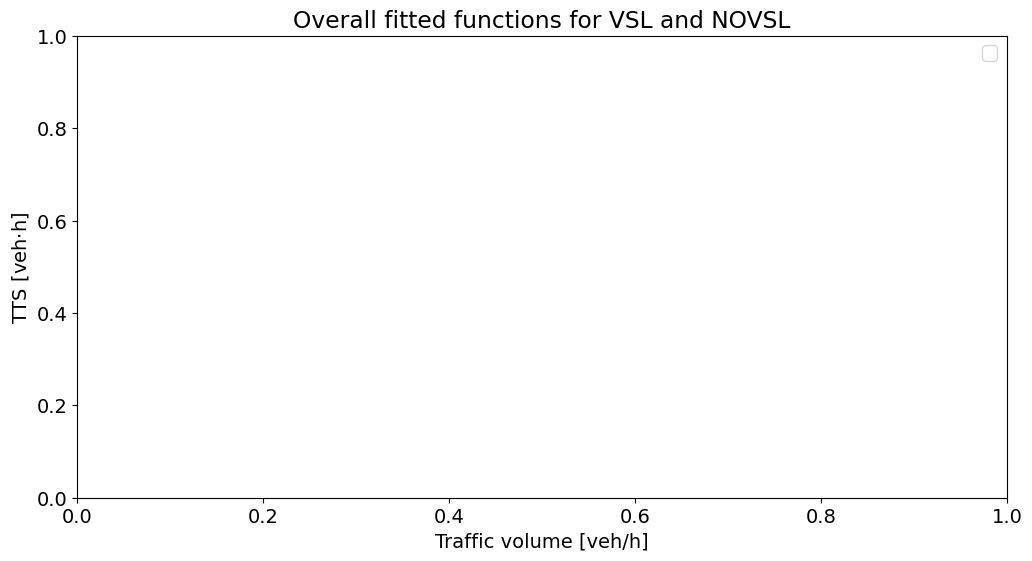

In [3]:
import re

import matplotlib.pyplot as plt
import numpy as np
import datetime
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# Set font for the figure
plt.rcParams.update({'font.size': 14})

_, ax = plt.subplots(figsize=(12, 6))

colors = {}
# Create graph for vsl
# for element in vsl_total:
#     interval = element['interval']
#     fitting_function_str = element['fitting_function']
# 
#     # Convert the string into a function
#     terms = re.findall(
#         r'([+-]?\s*\d+\.?\d*(?:e[+-]?\d+)?)(x\^\d+)?', fitting_function_str.replace(' ', ''))
#     coefficients = [0] * 10  # Initialize a list of 10 zeros
#     for term in terms:
#         coef = float(term[0])
#         if term[1]:  # If there is an 'x' term
#             exponent = int(term[1][2:])  # Get the exponent
#             while len(coefficients) <= exponent:  # Expand the list if needed
#                 coefficients.append(0)
#             # Assign the coefficient to the corresponding position in the list
#             coefficients[exponent] = coef
#         else:  # If there is no 'x' term, it's the constant term
#             coefficients[0] = coef
#     # Reverse the list to match the order expected by np.poly1d
#     fitting_function = np.poly1d(coefficients[::-1])
#     # Adjust the number of points as needed
#     x = np.linspace(interval[0], interval[1], 400)
#     y = fitting_function(x)
#     if fitting_function_str in colors.keys():
#         ax.plot(x, y, '--',linewidth=3, label=f'Interval vsl: [{round(interval[0]), round(interval[1])}]',color=colors[fitting_function_str])
#     else:
#         ax.plot(x, y, '--',linewidth=3, label=f'Interval vsl: [{round(interval[0]), round(interval[1])}]')
#         color = ax.get_lines()[-1].get_color()
#         colors[fitting_function_str] = color
    #plt.ylim([-100, 100])
    # ax.set_xticks(np.arange(*ax.get_xlim(),(ax.get_xlim()[1] - ax.get_xlim()[0]) / 20))
    
# Create the graph for novsl
colors = {}
# for element in novsl_total:
#     interval = element['interval']
#     fitting_function_str = element['fitting_function']
# 
#     # Convert the string into a function
#     terms = re.findall(
#         r'([+-]?\s*\d+\.?\d*(?:e[+-]?\d+)?)(x\^\d+)?', fitting_function_str.replace(' ', ''))
#     coefficients = [0] * 10  # Initialize a list of 10 zeros
#     for term in terms:
#         coef = float(term[0])
#         if term[1]:  # If there is an 'x' term
#             exponent = int(term[1][2:])  # Get the exponent
#             while len(coefficients) <= exponent:  # Expand the list if needed
#                 coefficients.append(0)
#             # Assign the coefficient to the corresponding position in the list
#             coefficients[exponent] = coef
#         else:  # If there is no 'x' term, it's the constant term
#             coefficients[0] = coef
#     # Reverse the list to match the order expected by np.poly1d
#     fitting_function = np.poly1d(coefficients[::-1])
# 
#     # Adjust the number of points as needed
#     x = np.linspace(interval[0], interval[1], 400)
#     y = fitting_function(x)
#     if fitting_function_str in colors.keys():
#         ax.plot(x, y, '-',linewidth=2, label=f'Interval novsl: [{round(interval[0]), round(interval[1])}]',color=colors[fitting_function_str])
#     else:
#         ax.plot(x, y, '-',linewidth=2, label=f'Interval novsl: [{round(interval[0]), round(interval[1])}]')
#         color = ax.get_lines()[-1].get_color()
#         colors[fitting_function_str] = color
#     #plt.ylim([-100, 100]
#     # ax.set_xticks(np.arange(*ax.get_xlim(),(ax.get_xlim()[1] - ax.get_xlim()[0]) / 20))
#     print(fitting_function_str)

# for element in remaining_unfit_intervals:
#     ax.axvspan(*element['interval'], color='gray',
#                alpha=0.3, label='unfit Interval')
plt.title("Overall fitted functions for VSL and NOVSL")
plt.xlabel('Traffic volume [veh/h]')
plt.ylabel('TTS [veh$\cdot$h]')
plt.legend()
plt.savefig(f"Total_fitted_functions-{timestamp}.pdf", format='pdf')

In [4]:
import pickle


vs_total = pickle.load(open("logger-vsl_script-fitted_intervals-20240715-110054.pkl","rb"))

## Experiments with the tailing

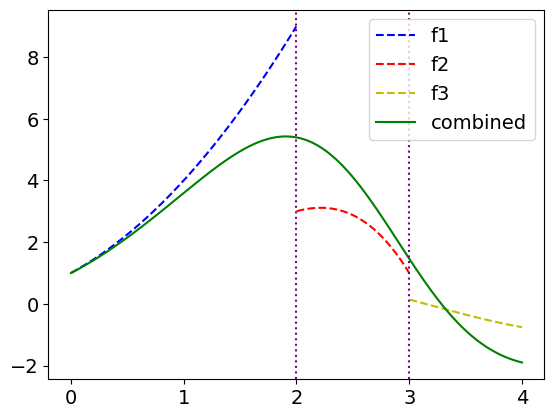

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the polynomial functions
def f1(x):
    return x**2 + 2*x + 1

def f2(x):
    return -x**3 + 4*x**2 - 3*x + 1

def f3(x):
    return np.sin(x)

# Put the functions in a list
functions = [f1, f2, f3]

# Define the connection points
connection_points = [2, 3]

# Define the x values
x = np.linspace(0, 4, 1000)

# Compute the y values for each function
y_values = [f(x) for f in functions]

# Define the transition function (sigmoid)
def transition(x, x_conn, width=1):
    return 1 / (1 + np.exp(-2/width*(x - x_conn)))

# Initialize the combined function as the first function
y = y_values[0]

# Iterate over the remaining functions
for i in range(1, len(functions)):
    # Compute the transition values
    t = transition(x, connection_points[i-1])

    # Update the combined function
    y = (1 - t) * y + t * y_values[i]

# Plot the functions and the combined function
colors = ['b', 'r', 'y']
labels = ['f1', 'f2', 'f3']
for i in range(len(functions)):
    if i == 0:
        plt.plot(x[x<=connection_points[i]], y_values[i][x<=connection_points[i]], colors[i]+'--', label=labels[i])
    elif i == len(functions) - 1:
        plt.plot(x[x>=connection_points[i-1]], y_values[i][x>=connection_points[i-1]], colors[i]+'--', label=labels[i])
    else:
        plt.plot(x[(x>=connection_points[i-1]) & (x<connection_points[i])], y_values[i][(x>=connection_points[i-1]) & (x<connection_points[i])], colors[i]+'--', label=labels[i])
plt.plot(x, y, 'g-', label='combined')
for x_conn in connection_points:
    plt.axvline(x=x_conn, color='purple', linestyle=':')
plt.legend()
plt.show()

[2500, 2783.69231]
[2783.69231, 2926.46154]
[2926.46154, 3576.30769]
[3576.30769, 3758.46154]
[3758.46154, 4000]
Fit points [(2600.0, 346.13889), (2681.53846, 361.94444), (2766.15385, 372.5), (2800.0, 378.27778), (2853.84615, 395.55556), (2875.0, 390.90278), (2944.61538, 400.51389), (3038.46154, 415.47222), (3135.38462, 429.73611), (3235.38462, 454.18056), (3338.46154, 503.125), (3444.61538, 546.125), (3553.84615, 584.81944), (3625.0, 604.84722), (3666.15385, 678.40278), (3700.0, 699.59722), (3781.53846, 730.69444), (3900.0, 784.58333)]
FIT POINT: (2600.0, 346.13889)
FIT POINT: (2681.53846, 361.94444)
FIT POINT: (2766.15385, 372.5)
FIT POINT: (2800.0, 378.27778)
FIT POINT: (2853.84615, 395.55556)
FIT POINT: (2875.0, 390.90278)
FIT POINT: (2944.61538, 400.51389)
FIT POINT: (3038.46154, 415.47222)
FIT POINT: (3135.38462, 429.73611)
FIT POINT: (3235.38462, 454.18056)
FIT POINT: (3338.46154, 503.125)
FIT POINT: (3444.61538, 546.125)
FIT POINT: (3553.84615, 584.81944)
FIT POINT: (3625.0, 60

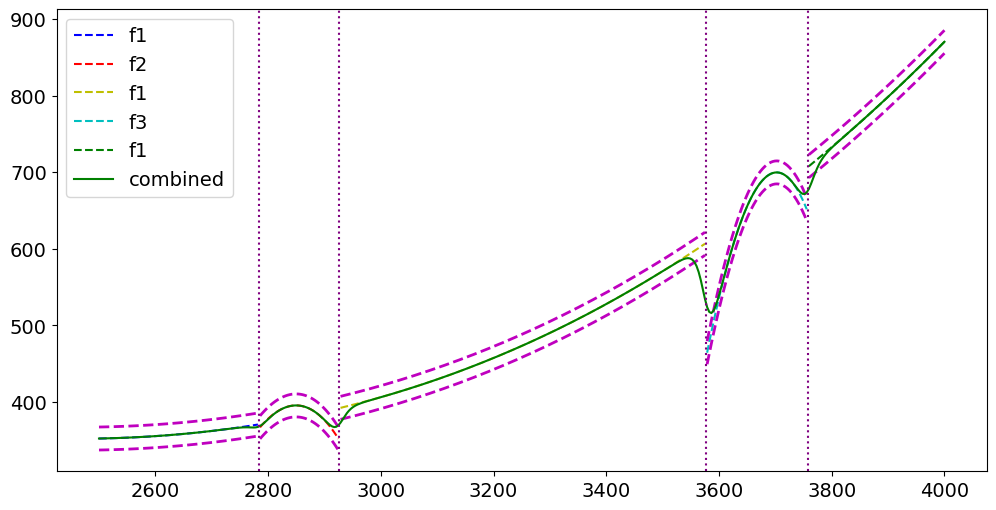

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import re
import os
import decimal
import math
os.environ['INSTANCE_NAME'] = 'VSL_script'
from global_settings import mds,vfs,ops
import matplotlib.pyplot as plt
import numpy as np
import datetime
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# Set font for the figure
# plt.rcParams.update({'font.size': 14})

_, ax = plt.subplots(figsize=(12, 6))

colors = {}
# Create graph for vsl
funcs = []

def get_coefficients(interval):
    # Convert the string into a function array of terms
    terms = re.findall(r'([+-]?\s*\d+\.?\d*(?:e[+-]?\d+)?)(x\^\d+)?', interval['fitting_function'].replace(' ', ''))
    # For each element if x present, we extract exponent
    coefficients = [0] * (vfs['max_deg']+1)  # Initialize a list for coefficients
    for term in terms:
        coef = float(term[0])
        if term[1]:  # If there is an 'x' term
            exponent = int(term[1][2:])  # Get the exponent
            while len(coefficients) <= exponent:  # Expand the list if needed
                coefficients.append(0)
            # Assign the coefficient to the corresponding position in the list
            coefficients[exponent] = coef
        else:  # If there is no 'x' term, it's the constant term
            coefficients[0] = coef
    return coefficients

connection_points = []
labels = []
points = []
functions = {}
for element in vsl_total:
    interval = element['interval']
    print(interval)
    fitting_function_str = element['fitting_function']
    labels.append(fitting_function_str)
    [points.append(i) for i in element['fit_points']]
    
    coefficients = get_coefficients(element)
    fitting_function = np.poly1d(coefficients[::-1])
    
    functions[(interval[0],interval[1])] = fitting_function
    funcs.append(fitting_function)
    
    if interval[1] != mds["domain_max_interval"]:
        connection_points.append(interval[1])
x_point = []
y_point = []
print(f"Fit points {points}")
for fit_point in points:
    print(f"FIT POINT: {fit_point}")
    x_point.append(fit_point[0])
    y_point.append(fit_point[1])


x = np.linspace(mds["domain_min_interval"],mds["domain_max_interval"],400)
print(f"mx {x.max()} and {x.min()}")



# Compute the y values for each function
y_values = [f(x) for f in funcs]
# Initialize the combined function as the first function
y = y_values[0]
# Define the transition function (sigmoid)
def transition(x, x_conn, width=ops['sigmoid_width']):
    return 1 / (1 + np.exp(-2/width*(x - x_conn)))


# Iterate over the remaining functions
for i in range(1, len(functions)):
    # Compute the transition values
    t = transition(x, connection_points[i-1])

    # Update the combined function
    y = (1 - t) * y + t * y_values[i]

# Plot the functions and the combined function
labels = ['f1','f2','f1','f3','f1']
colors = ['b', 'r', 'y', 'c','g','y','b','m']
for i in range(len(functions)):
    if i == 0:
        ax.plot(x[x<=connection_points[i]], y_values[i][x<=connection_points[i]], colors[i]+'--', label=labels[i])
        ax.plot(x[x<=connection_points[i]], y_values[i][x<=connection_points[i]]-vfs['threshold_y_fitting'],'m--', linewidth=2)
        ax.plot(x[x<=connection_points[i]], y_values[i][x<=connection_points[i]]+vfs['threshold_y_fitting'],'m--', linewidth=2)
    elif i == len(functions) - 1:
        ax.plot(x[x>=connection_points[i-1]], y_values[i][x>=connection_points[i-1]], colors[i]+'--', label=labels[i])
        ax.plot(x[x>=connection_points[i-1]], y_values[i][x>=connection_points[i-1]]-vfs['threshold_y_fitting'],'m--', linewidth=2)
        ax.plot(x[x>=connection_points[i-1]], y_values[i][x>=connection_points[i-1]]+vfs['threshold_y_fitting'],'m--', linewidth=2)
    else:
        ax.plot(x[(x>=connection_points[i-1]) & (x<connection_points[i])], y_values[i][(x>=connection_points[i-1]) & (x<connection_points[i])], colors[i]+'--', label=labels[i])
        ax.plot(x[(x>=connection_points[i-1]) & (x<connection_points[i])],( y_values[i][(x>=connection_points[i-1]) & (x<connection_points[i])]) -vfs['threshold_y_fitting'],'m--', linewidth=2)
        ax.plot(x[(x>=connection_points[i-1]) & (x<connection_points[i])], y_values[i][(x>=connection_points[i-1]) & (x<connection_points[i])] +vfs['threshold_y_fitting'], 'm--', linewidth=2)
ax.plot(x, y, 'g-', label='combined')
for x_conn in connection_points:
    plt.axvline(x=x_conn, color='purple', linestyle=':')
plt.legend()
plt.show()

[2500, 2783.69231]
[2783.69231, 2926.46154]
[2926.46154, 3576.30769]
[3576.30769, 3758.46154]
[3758.46154, 4000]
Fit points [(2600.0, 346.13889), (2681.53846, 361.94444), (2766.15385, 372.5), (2800.0, 378.27778), (2853.84615, 395.55556), (2875.0, 390.90278), (2944.61538, 400.51389), (3038.46154, 415.47222), (3135.38462, 429.73611), (3235.38462, 454.18056), (3338.46154, 503.125), (3444.61538, 546.125), (3553.84615, 584.81944), (3625.0, 604.84722), (3666.15385, 678.40278), (3700.0, 699.59722), (3781.53846, 730.69444), (3900.0, 784.58333)]
FIT POINT: (2600.0, 346.13889)
FIT POINT: (2681.53846, 361.94444)
FIT POINT: (2766.15385, 372.5)
FIT POINT: (2800.0, 378.27778)
FIT POINT: (2853.84615, 395.55556)
FIT POINT: (2875.0, 390.90278)
FIT POINT: (2944.61538, 400.51389)
FIT POINT: (3038.46154, 415.47222)
FIT POINT: (3135.38462, 429.73611)
FIT POINT: (3235.38462, 454.18056)
FIT POINT: (3338.46154, 503.125)
FIT POINT: (3444.61538, 546.125)
FIT POINT: (3553.84615, 584.81944)
FIT POINT: (3625.0, 60

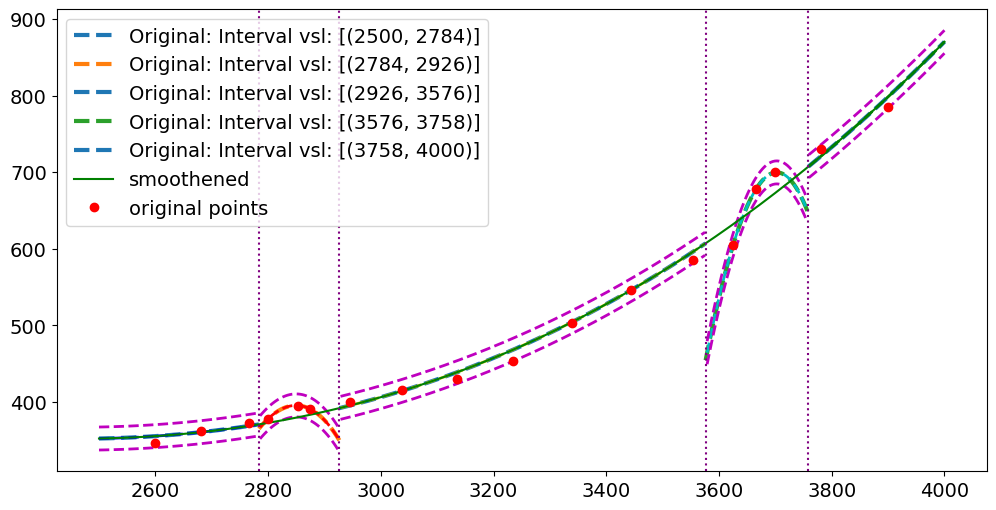

In [7]:
import re
import os
import decimal
import math
os.environ['INSTANCE_NAME'] = 'VSL_script'
from global_settings import mds,vfs
import matplotlib.pyplot as plt
import numpy as np
import datetime
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# Set font for the figure
# plt.rcParams.update({'font.size': 14})

_, ax = plt.subplots(figsize=(12, 6))

colors = {}
# Create graph for vsl
funcs = []

def get_coefficients(interval):
    # Convert the string into a function array of terms
    terms = re.findall(r'([+-]?\s*\d+\.?\d*(?:e[+-]?\d+)?)(x\^\d+)?', interval['fitting_function'].replace(' ', ''))
    # For each element if x present, we extract exponent
    coefficients = [0] * (vfs['max_deg']+1)  # Initialize a list for coefficients
    for term in terms:
        coef = float(term[0])
        if term[1]:  # If there is an 'x' term
            exponent = int(term[1][2:])  # Get the exponent
            while len(coefficients) <= exponent:  # Expand the list if needed
                coefficients.append(0)
            # Assign the coefficient to the corresponding position in the list
            coefficients[exponent] = coef
        else:  # If there is no 'x' term, it's the constant term
            coefficients[0] = coef
    return coefficients


for element in vsl_total:
    interval = element['interval']
    fitting_function_str = element['fitting_function']

    # Convert the string into a function
    terms = re.findall(
        r'([+-]?\s*\d+\.?\d*(?:e[+-]?\d+)?)(x\^\d+)?', fitting_function_str.replace(' ', ''))
    coefficients = [0] * 10  # Initialize a list of 10 zeros
    for term in terms:
        coef = float(term[0])
        if term[1]:  # If there is an 'x' term
            exponent = int(term[1][2:])  # Get the exponent
            while len(coefficients) <= exponent:  # Expand the list if needed
                coefficients.append(0)
            # Assign the coefficient to the corresponding position in the list
            coefficients[exponent] = coef
        else:  # If there is no 'x' term, it's the constant term
            coefficients[0] = coef
    # Reverse the list to match the order expected by np.poly1d
    fitting_function = np.poly1d(coefficients[::-1])
    # Adjust the number of points as needed
    x = np.linspace(interval[0], interval[1], 400)
    y = fitting_function(x)
    if fitting_function_str in colors.keys():
        ax.plot(x, y, '--',linewidth=3, label=f'Original: Interval vsl: [{round(interval[0]), round(interval[1])}]',color=colors[fitting_function_str])
    else:
        ax.plot(x, y, '--',linewidth=3, label=f'Original: Interval vsl: [{round(interval[0]), round(interval[1])}]')
        color = ax.get_lines()[-1].get_color()
        colors[fitting_function_str] = color



connection_points = []
labels = []
points = []
functions = {}
for element in vs_total:
    interval = element['interval']
    print(interval)
    fitting_function_str = element['fitting_function']
    labels.append(fitting_function_str)
    [points.append(i) for i in element['fit_points']]
    
    coefficients = get_coefficients(element)
    fitting_function = np.poly1d(coefficients[::-1])
    
    functions[(interval[0],interval[1])] = fitting_function
    funcs.append(fitting_function)
    
    if interval[1] != mds["domain_max_interval"]:
        connection_points.append(interval[1])
x_point = []
y_point = []
print(f"Fit points {points}")
for fit_point in points:
    print(f"FIT POINT: {fit_point}")
    x_point.append(fit_point[0])
    y_point.append(fit_point[1])
    
x = np.linspace(mds["domain_min_interval"],mds["domain_max_interval"],400)
print(f"mx {x.max()} and {x.min()}")
# Define the transition function (sigmoid)
def transition(x, x_conn, width=15):
    # print(f"1 / (1 + np.exp(-2 / {type(width)} * ({type(x)} - {type(x_conn)})))")
    # print(f"1 / (1 + np.exp(-2 / {width} * ({x} - {x_conn}))) ")
    return 1.0 / (1.0 + np.exp(-2/width*(x - x_conn)))


# Initialize the combined function as the first function
# This is wrong only create the functions in the needed intervals
y_values = [f(x) for f in funcs]
print(y_values)
y = y_values[0]
i=0

print(f" LENGHT y values : {len(y_values)}")
# y = y_values[0]
# print(f" y values {y_values}")
print(f"array {y}")



# Iterate over the remaining functions
# for i in range(1, len(funcs)):
#     # Compute the transition values
#     # t = transition(x, connection_points[i-1])
#     # print(f"TRANSITION {t}")
#     # Update the combined function
#     # y = (1 - t) * y + t * y_values[i]
#     if i == len(funcs) - 1:
#         #print(f" X values {len(x[x>=connection_points[i-1]])} and y values {len(y_values[i][x>=connection_points[i-1]])}")
#         # print(f" X values {x[x>=connection_points[i-1]]} and y values {y_values[i][x>=connection_points[i-1]]}")
#         y = np.append(y,smooth_transition_functions(x[x>=connection_points[i-1]],y_values[x>=connection_points[i-1]],connection_points[i-1],1))
#     else:
#         #print(f" X values {len(x[(x>=connection_points[i-1]) & (x<connection_points[i])])} and y values {len(y_values[i][(x>=connection_points[i-1]) & (x<connection_points[i])])}")
#         #print(f" X values {x[(x>=connection_points[i-1]) & (x<connection_points[i])]} and y values {y_values[i][(x>=connection_points[i-1]) & (x<connection_points[i])]}")
#         y = np.append(y,smooth_transition_functions(x[(x>=connection_points[i-1]) & (x<connection_points[i])],y_values[(x>=connection_points[i-1]) & (x<connection_points[i])],connection_points[i-1],1))

    
    
    
# Plot the functions and the combined function
#print(connection_points)
# print(len(y))
# print(len(x))
print(connection_points)
labels = ['f1','f2','f1','f3','f1']
colors = ['b', 'r', 'y', 'c','g','y','b','m']
i=0
for i in range(len(funcs)):
    if i == 0:
        ax.plot(x[x<=connection_points[i]], y_values[i][x<=connection_points[i]],colors[i]+'--', linewidth=2)
        ax.plot(x[x<=connection_points[i]], y_values[i][x<=connection_points[i]]-vfs['threshold_y_fitting'],'m--', linewidth=2)
        ax.plot(x[x<=connection_points[i]], y_values[i][x<=connection_points[i]]+vfs['threshold_y_fitting'],'m--', linewidth=2)
    elif i == len(funcs) - 1:
        ax.plot(x[x>=connection_points[i-1]], y_values[i][x>=connection_points[i-1]],colors[i]+'--', linewidth=2)
        ax.plot(x[x>=connection_points[i-1]], y_values[i][x>=connection_points[i-1]]-vfs['threshold_y_fitting'],'m--', linewidth=2)
        ax.plot(x[x>=connection_points[i-1]], y_values[i][x>=connection_points[i-1]]+vfs['threshold_y_fitting'],'m--', linewidth=2)
    else:
        ax.plot(x[(x>=connection_points[i-1]) & (x<connection_points[i])], y_values[i][(x>=connection_points[i-1]) & (x<connection_points[i])], colors[i]+'--', linewidth=2)
        ax.plot(x[(x>=connection_points[i-1]) & (x<connection_points[i])],( y_values[i][(x>=connection_points[i-1]) & (x<connection_points[i])]) -vfs['threshold_y_fitting'],'m--', linewidth=2)
        ax.plot(x[(x>=connection_points[i-1]) & (x<connection_points[i])], y_values[i][(x>=connection_points[i-1]) & (x<connection_points[i])] +vfs['threshold_y_fitting'], 'm--', linewidth=2)
        
print(f" X is {type(x)} and y is {type(y)}")
ax.plot(x, y, 'g-', label='smoothened')
for x_conn in connection_points:
    ax.axvline(x=x_conn, color='purple', linestyle=':')
ax.plot(x_point,y_point, "ro", label="original points")
plt.legend()
plt.show()

In [41]:

x = np.linspace(mds["domain_min_interval"],mds["domain_max_interval"],400)
y_values = np.ndarray(shape=len(x))
x_values = []
for k,v in functions.items():
    print(f" key {k[0]} {k[1]}, value {v}")
    x_val = x[np.logical_and(x >= k[0], x <= k[1])]
    print(f" LENGHT x val = {len(x_val)}")
    y_values = [v(x) for x in x_val]

print(f" YVALUES {type(y_values)}")

 key 2500 2783.69231, value            3             2
3.247e-08 x - 7.118e-05 x - 0.2393 x + 888.3
 LENGHT x val = 76
 key 2783.69231 2926.46154, value             6             5             4             3             2
-1.312e-17 x - 1.277e-16 x + 6.358e-11 x + 2.429e-07 x + 0.0005248 x + 0.04548 x - 6757
 LENGHT x val = 38
 key 2926.46154 3576.30769, value            3             2
3.247e-08 x - 7.118e-05 x - 0.2393 x + 888.3
 LENGHT x val = 173
 key 3576.30769 3758.46154, value             6             5            4             3            2
-1.054e-17 x + 3.678e-16 x + 8.71e-11 x + 4.232e-07 x + 0.001159 x - 0.01799 x - 2.608e+04
 LENGHT x val = 48
 key 3758.46154 4000, value            3             2
3.247e-08 x - 7.118e-05 x - 0.2393 x + 888.3
 LENGHT x val = 65
 YVALUES <class 'list'>


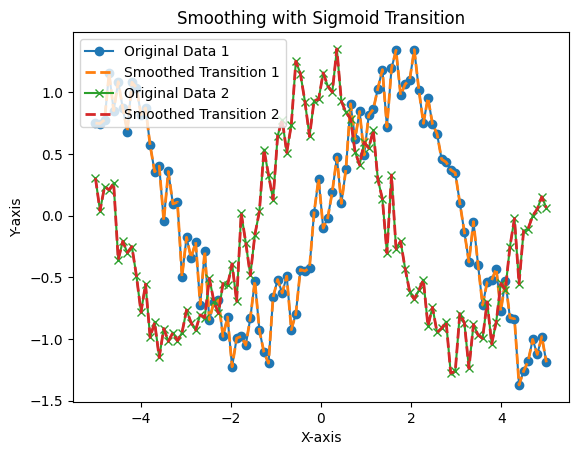

In [125]:


import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x, a, b, c):
    return c / (1.0 + np.exp(-a * (x - b)))

def smooth_transition_functions(x_values, y_values, x_conn, width):
    smoothed_y_values = []
    for i, x in enumerate(x_values):
        t = sigmoid(x, a=1, b=x_conn, c=1)
        smoothed_y = (1 - t) * y_values[i] + t * y_values[i]
        smoothed_y_values.append(smoothed_y)
    return smoothed_y_values

# Example data
xdata = np.linspace(-5, 5, 100)
ydata1 = np.sin(xdata) + 0.2 * np.random.normal(size=len(xdata))
ydata2 = np.cos(xdata) + 0.2 * np.random.normal(size=len(xdata))

# Parameters for the transition
x_conn = 0.5  # Connection point
width = 1.0   # Width of the transition

# Calculate smoothed y values for both functions
smoothed_y1 = smooth_transition_functions(xdata, ydata1, x_conn, width)
smoothed_y2 = smooth_transition_functions(xdata, ydata2, x_conn, width)

# Plot the original data and the smoothed transitions
plt.plot(xdata, ydata1, label="Original Data 1", marker="o")
plt.plot(xdata, smoothed_y1, label="Smoothed Transition 1", linestyle="--", linewidth=2)

plt.plot(xdata, ydata2, label="Original Data 2", marker="x")
plt.plot(xdata, smoothed_y2, label="Smoothed Transition 2", linestyle="--", linewidth=2)

plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Smoothing with Sigmoid Transition")
plt.show()

In [3]:
import pickle
# Load the pickle files for threshold 15
vsl_total = pickle.load(open("logger-vsl.pkl", "rb"))
novsl_total = pickle.load(open("logger-novsl.pkl", "rb"))

In [12]:
import re
import os
os.environ['INSTANCE_NAME'] = 'VSL_script_TEST'
import warnings
# warnings.filterwarnings("error")
import matplotlib.pyplot as plt
import numpy as np
import datetime
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

from global_settings import ops, mds, vfs

from dataclasses import dataclass
from typing import Tuple, List

@dataclass
class FittedFunction:
    """Class for keeping track fitted functions."""
    name: str
    interval: Tuple[float, float]
    func_form: float
    fitted_points: List[Tuple[float,float]]
    # color: str
    
    # def get_color(self) -> str:
    #     return self.color
    
    def get_interval(self) -> Tuple[float, float]:
        return self.interval


@dataclass
class FunctionValues:
    name: str
    x_values: np.ndarray
    y_values: np.ndarray
    

def get_coefficients(interval):
    # Convert the string into a function array of terms
    terms = re.findall(r'([+-]?\s*\d+\.?\d*(?:e[+-]?\d+)?)(x\^\d+)?', interval['fitting_function'].replace(' ', ''))
    # For each element if x present, we extract exponent
    coefficients = [0] * (vfs['max_deg']+1)  # Initialize a list for coefficients
    for term in terms:
        coef = float(term[0])
        if term[1]:  # If there is an 'x' term
            exponent = int(term[1][2:])  # Get the exponent
            while len(coefficients) <= exponent:  # Expand the list if needed
                coefficients.append(0)
            # Assign the coefficient to the corresponding position in the list
            coefficients[exponent] = coef
        else:  # If there is no 'x' term, it's the constant term
            coefficients[0] = coef
    return coefficients

def _plot_results_tailing(all_fit_intervals_data):
    # Create graph
    _, ax = plt.subplots(figsize=(ops['figsize_x'], ops['figsize_y']))
    # Remember color for the same fitted functions
    points = []
    funcs = []
    connection_points = []
    funcs_values = []
    # Create x values
    x = np.linspace(mds["domain_min_interval"], mds["domain_max_interval"],600)
    # Save labels and points for the fitting functions
    for element in all_fit_intervals_data:
        # Get coefficients
        coefficients = get_coefficients(element)
        fitting_function = np.poly1d(coefficients[::-1])
        f = FittedFunction(name=element['fitting_function'], interval=element['interval'], func_form=fitting_function,fitted_points=[points.append(i) for i in element['fit_points']])
        funcs.append(f)
        x_temp = x[np.logical_and(x >= f.interval[0], x <= f.interval[1])]
        f_values = FunctionValues(name=element['fitting_function'], x_values=x[np.logical_and(x >= f.interval[0], x <= f.interval[1])], y_values=np.array([f.func_form(el) for el in x_temp]))
        funcs_values.append(f_values)

        if f.interval[1] != mds["domain_max_interval"]:
            connection_points.append(f.interval[1])
    
    print(f"CONNECTION POINTS: {connection_points}")

    if ops['predicted_points']:
        x_point = []
        y_point = []
        for fit_point in points:
            print(f"FIT POINT: {fit_point}")
            x_point.append(fit_point[0])
            y_point.append(fit_point[1])

    def transition(x, x_conn, width=1):
        return 1.0 / (1.0 + np.exp(-2 / width * (x - x_conn)))

    # Initialize the combined total function with the first function values
    y =  np.array([funcs[0].func_form(val) for val in x])
    import copy
    yy = copy.deepcopy(y)
    # Create first index for the total combined function
    y_val_len = 0
    # Iterate over the remaining functions
    # for it in range(1, len(funcs)):
    #     print(f"IT {it}")
    #     if it == len(funcs):
    #         t = transition((funcs_values[it-1].x_values[:-10] + funcs_values[it].x_values[10:]), connection_points[it-2])
    #     else:
    #         t = transition((funcs_values[it-1].x_values[:-10] + funcs_values[it].x_values[10:]), connection_points[it-1])
    #     # Create end value for the specific part of the final function
    #     end_value = y_val_len + (len(funcs_values[it].y_values))
    #     # Update appropriate part of the combined function
    #     #print(f"In point {connection_points[it]} For transition: {funcs_values[it].x_values}")
    #     if it != 0: 
    #         print(f"T : {t} lenght {len(t)}")
    #         print(f" NUMBERS: {(end_value-10)}  lenght {end_value+10}")
    #         print(f"first: {y[(end_value-10):(end_value+10)]}  lenght {len(y[end_value-10:end_value+10])}")
    #         y[end_value-10:end_value+10] = (1 - t) * y[end_value-10:end_value+10] + t * (funcs_values[it-1].y_values[:-10] + funcs_values[it].y_values[10:])
    #         print(f"after: {y[y_val_len:end_value]}")
    #         y_val_len = end_value
    
    nop = 25
    for c,cpoint in enumerate(connection_points):
        
        # For connection point c take function c and function c+1
        end_value = y_val_len + (len(funcs_values[c].y_values))
        x_vals = np.concatenate((funcs_values[c].x_values[-nop:], funcs_values[c+1].x_values[:nop]))
        print(f" For {c} and p {cpoint} X VALUES {x_vals}")
        y_vals_1 = np.array([funcs[c].func_form(x) for x in x_vals])
        y_vals_2 = np.array([funcs[c+1].func_form(x) for x in x_vals])
        t = transition(x_vals, cpoint)
        # Create end value for the specific part of the final function
        end_value = y_val_len + (len(funcs_values[c].y_values))
        print(f"T : {t} lenght {len(t)}")
        print(f" NUMBERS: {(end_value-nop)}  lenght {end_value+nop}")
        print(f"first: {y[(end_value-nop):(end_value+nop)]}  lenght {len(y[end_value-nop:end_value+nop])}")
        temp = (1 - t) * y_vals_1 + t * y_vals_2
        ii = 0
        for index in range(end_value-nop,end_value+nop):
            y[index] = temp[ii]
            ii +=1
        print(f"temp: {temp}  lenght {len(y[end_value-nop:end_value+nop])}")
        print(f" SECOND : {y[(end_value-nop):(end_value+nop)]}  lenght {len(y[end_value-nop:end_value+nop])}")
        y_val_len = end_value
        

        
        
    
    colors = {}
    for i in range(0, len(funcs)):
        custom_label = f"Interval: [{funcs[i].interval[0]},{funcs[i].interval[1]}]"
        if funcs[i].name in colors.keys():
            ax.plot(funcs_values[i].x_values, funcs_values[i].y_values, label=custom_label, color=colors[funcs[i].name],linewidth=2)
        else:
            ax.plot(funcs_values[i].x_values, funcs_values[i].y_values, label=custom_label,linewidth=2)
            color = ax.get_lines()[-1].get_color()
            colors[funcs[i].name] = color


    # for element in remaining_unfit_intervals:
    #     ax.axvspan(*element['interval'], color='gray',
    #                alpha=0.3, label='unfit Interval')
    ax.plot(x, y, 'r--', label='smoothened',linewidth=2)
    for x_conn in connection_points:
        ax.axvline(x=x_conn, color='purple', linestyle=':')

    if ops['predicted_points']:
        ax.plot(x_point, y_point, "ro", label="original points")
    plt.xlabel(ops['x_labels'])
    plt.ylabel(ops['y_labels'])
    plt.title(ops['title'])
    plt.legend()
    plt.show()

CONNECTION POINTS: [2783.69231, 2926.46154, 3576.30769, 3758.46154]
FIT POINT: (2600.0, 346.13889)
FIT POINT: (2681.53846, 361.94444)
FIT POINT: (2766.15385, 372.5)
FIT POINT: (2800.0, 378.27778)
FIT POINT: (2853.84615, 395.55556)
FIT POINT: (2875.0, 390.90278)
FIT POINT: (2944.61538, 400.51389)
FIT POINT: (3038.46154, 415.47222)
FIT POINT: (3135.38462, 429.73611)
FIT POINT: (3235.38462, 454.18056)
FIT POINT: (3338.46154, 503.125)
FIT POINT: (3444.61538, 546.125)
FIT POINT: (3553.84615, 584.81944)
FIT POINT: (3625.0, 604.84722)
FIT POINT: (3666.15385, 678.40278)
FIT POINT: (3700.0, 699.59722)
FIT POINT: (3781.53846, 730.69444)
FIT POINT: (3900.0, 784.58333)
 For 0 and p 2783.69231 X VALUES [2722.87145242 2725.37562604 2727.87979967 2730.38397329 2732.88814691
 2735.39232053 2737.89649416 2740.40066778 2742.9048414  2745.40901503
 2747.91318865 2750.41736227 2752.92153589 2755.42570952 2757.92988314
 2760.43405676 2762.93823038 2765.44240401 2767.94657763 2770.45075125
 2772.95492487 27

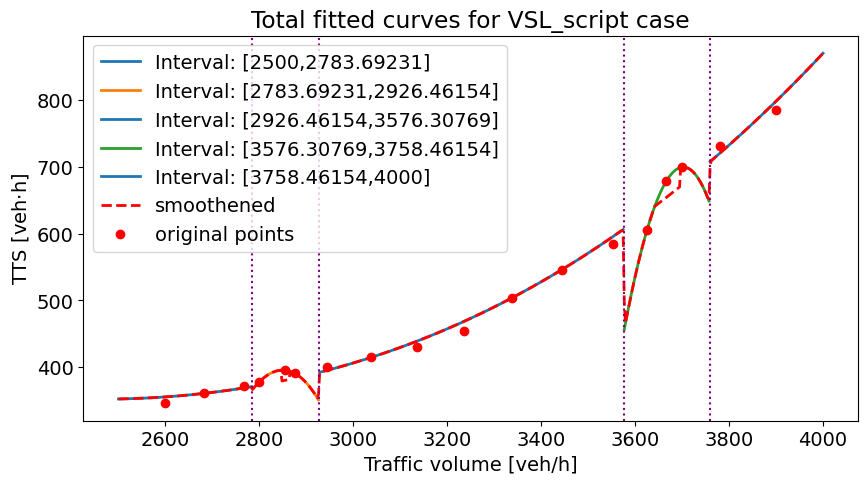

In [14]:
_plot_results_tailing(vsl_total)

NameError: name 'FittedFunction' is not defined

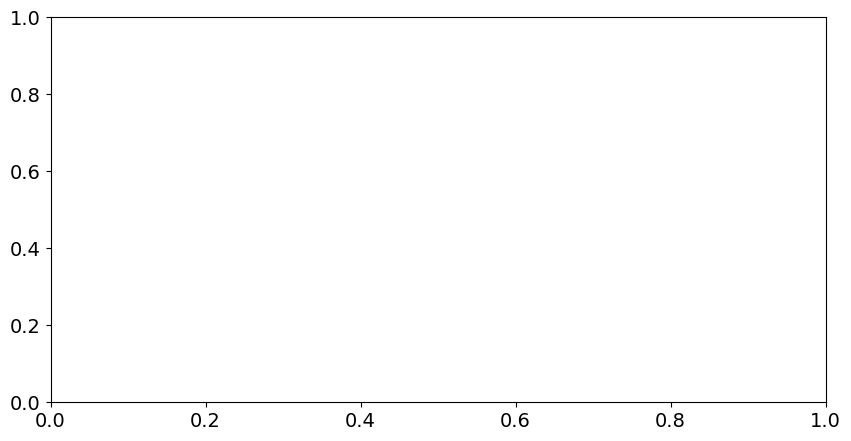

In [11]:
plot_results_tailing(vsl_total)

In [6]:
xx = np.linspace(mds["domain_min_interval"], mds["domain_max_interval"],400)
xx[-2:]

array([3996.2406015, 4000.       ])

In [123]:
import numpy as np

# Create a sample array
arr = np.array([1, 2, 3, 4, 5])

# Change the value at index 2 to 10
arr[2] = 10

# Print the modified array
print(arr)

[ 1  2 10  4  5]


In [ ]:
import re
import os
os.environ['INSTANCE_NAME'] = 'VSL_script_TEST'
import warnings
# warnings.filterwarnings("error")
import matplotlib.pyplot as plt
import numpy as np
import datetime
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

from global_settings import ops, mds, vfs

from dataclasses import dataclass
from typing import Tuple

@dataclass
class FittedFunction:
    """Class for keeping track fitted functions."""
    name: str
    interval: Tuple[float, float]
    func_form: float
    color: str
    fitted_points: Tuple[float, float]

    def get_color(self) -> str:
        return self.color
    
    def get_interval(self) -> Tuple[float, float]:
        return self.interval
    
    

def get_coefficients(interval):
    # Convert the string into a function array of terms
    terms = re.findall(r'([+-]?\s*\d+\.?\d*(?:e[+-]?\d+)?)(x\^\d+)?', interval['fitting_function'].replace(' ', ''))
    # For each element if x present, we extract exponent
    coefficients = [0] * (vfs['max_deg']+1)  # Initialize a list for coefficients
    for term in terms:
        coef = float(term[0])
        if term[1]:  # If there is an 'x' term
            exponent = int(term[1][2:])  # Get the exponent
            while len(coefficients) <= exponent:  # Expand the list if needed
                coefficients.append(0)
            # Assign the coefficient to the corresponding position in the list
            coefficients[exponent] = coef
        else:  # If there is no 'x' term, it's the constant term
            coefficients[0] = coef
    return coefficients

def _plot_results_tailing(all_fit_intervals_data):
    # Create graph
    _, ax = plt.subplots(figsize=(ops['figsize_x'], ops['figsize_y']))
    # Remember color for the same fitted functions
    colors = {}
    points = []
    labels = []
    funcs = []
    connection_points = []
    functions = {}
    # Save labels and points for the fitting functions
    for element in all_fit_intervals_data:
        # Get coefficients
        coefficients = get_coefficients(element)
        fitting_function = np.poly1d(coefficients[::-1])
        f = FittedFunction(name=element['fitting_function'], interval=element['interval'], func_form=fitting_function)
        funcs.append(f)
        # interval = element['interval']
        # fitting_function_str = element['fitting_function']
        # labels.append(fitting_function_str)
        [points.append(i) for i in element['fit_points']]

        # Get coefficients
        coefficients = get_coefficients(element)
        fitting_function = np.poly1d(coefficients[::-1])
        functions[(interval[0],interval[1])] = fitting_function
        funcs.append(fitting_function)

        if interval[1] != mds["domain_max_interval"]:
            connection_points.append(interval[1])

    if ops['predicted_points']:
        x_point = []
        y_point = []
        for fit_point in points:
            print(f"FIT POINT: {fit_point}")
            x_point.append(fit_point[0])
            y_point.append(fit_point[1])

    # Create x values
    x = np.linspace(mds["domain_min_interval"], mds["domain_max_interval"],400)

    def transition(x, x_conn, width=1):
        print(f"1 / (1 + np.exp(-2 / {type(width)} * ({type(x)} - {type(x_conn)})))")
        print(f"1 / (1 + np.exp(-2 / {width} * ({x} - {x_conn}))) ")
        return 1.0 / (1.0 + np.exp(-2 / width * (x - x_conn)))

    # Fit the y values for the generated x
    y_values = [f(x) for f in funcs]
    # Initialize the first function as base for the combined
    y = y_values[0]

    # Iterate over the remaining functions
    # for i in range(1, len(funcs)):
    ii = 1
    for k,v in functions.items():
        # Compute the transition values
        print(f"iii  {ii}")
        if ii == 1:
            t = transition(x[np.logical_and(x >= k[0], x <= k[1])], k[1])
            # Update the combined function
            y[np.logical_and(x >= k[0], x <= k[1])] = (1 - t) * y[np.logical_and(x >= k[0], x <= k[1])] + t * y_values[ii]
        else:
            t = transition(x[np.logical_and(x >= k[0], x <= k[1])], connection_points[ii-1])
            # Update the combined function
            y[np.logical_and(x >= k[0], x <= k[1])] = (1 - t) * y[np.logical_and(x >= k[0], x <= k[1])] + t * y_values[ii]
        ii +=1

    for i in range(len(funcs)):
        # For the first function
        if i == 0:
            ax.plot(x[x <= connection_points[i]], y_values[i][x <= connection_points[i]], label=labels[i],
                    linewidth=2)
            color = ax.get_lines()[-1].get_color()
            colors[labels[i]] = color
            ax.plot(x[x <= connection_points[i]],
                        y_values[i][x <= connection_points[i]] - vfs['threshold_y_fitting'], 'm--', linewidth=2)
            ax.plot(x[x <= connection_points[i]],
                        y_values[i][x <= connection_points[i]] + vfs['threshold_y_fitting'], 'm--', linewidth=2)
        # Check if the function was already plotted and use the same color
        elif labels[i] in colors.keys() and i != len(funcs) - 1:
            print(f"Con points: {i}  and {len(connection_points)} {connection_points[i - 1]}")
            ax.plot(x[(x >= connection_points[i - 1]) & (x < connection_points[i])],
                    y_values[i][(x >= connection_points[i - 1]) & (x < connection_points[i])], colors[labels[i]],
                    label=labels[i], linewidth=2)
            ax.plot(x[(x >= connection_points[i - 1]) & (x < connection_points[i])],
                    (y_values[i][(x >= connection_points[i - 1]) & (x < connection_points[i])]) - vfs[
                        'threshold_y_fitting'], 'm--', linewidth=2)
            ax.plot(x[(x >= connection_points[i - 1]) & (x < connection_points[i])],
                    y_values[i][(x >= connection_points[i - 1]) & (x < connection_points[i])] + vfs[
                        'threshold_y_fitting'], 'm--', linewidth=2)
        elif i == len(funcs) - 1 and labels[i] in colors.keys():  # Last function
            ax.plot(x[x >= connection_points[i - 1]], y_values[i][x >= connection_points[i - 1]],
                    colors[labels[i]], label=labels[i], linewidth=2)
            ax.plot(x[x >= connection_points[i - 1]],
                    y_values[i][x >= connection_points[i - 1]] - vfs['threshold_y_fitting'], 'm--', linewidth=2)
            ax.plot(x[x >= connection_points[i - 1]],
                    y_values[i][x >= connection_points[i - 1]] + vfs['threshold_y_fitting'], 'm--', linewidth=2)
        elif i == len(funcs) - 1 and labels[i] not in colors.keys():  # Last function
            ax.plot(x[x >= connection_points[i - 1]], y_values[i][x >= connection_points[i - 1]], label=labels[i],
                    linewidth=2)
        else:
            ax.plot(x[(x >= connection_points[i - 1]) & (x < connection_points[i])],
                    y_values[i][(x >= connection_points[i - 1]) & (x < connection_points[i])], '--',
                    label=labels[i], linewidth=2)
            ax.plot(x[(x >= connection_points[i - 1]) & (x < connection_points[i])],
                    (y_values[i][(x >= connection_points[i - 1]) & (x < connection_points[i])]) - vfs[
                        'threshold_y_fitting'], 'm--', linewidth=2)
            ax.plot(x[(x >= connection_points[i - 1]) & (x < connection_points[i])],
                    y_values[i][(x >= connection_points[i - 1]) & (x < connection_points[i])] + vfs[
                        'threshold_y_fitting'], 'm--', linewidth=2)
            color = ax.get_lines()[-1].get_color()
            colors[labels[i]] = color


    # for element in remaining_unfit_intervals:
    #     ax.axvspan(*element['interval'], color='gray',
    #                alpha=0.3, label='unfit Interval')
    ax.plot(x, y, 'g-', label='smoothened')
    for x_conn in connection_points:
        ax.axvline(x=x_conn, color='purple', linestyle=':')

    if ops['predicted_points']:
        ax.plot(x_point, y_point, "ro", label="original points")
    plt.xlabel(ops['x_labels'])
    plt.ylabel(ops['y_labels'])
    plt.title(ops['title'])
    plt.legend()
    plt.show()

In [ ]:
    # Iterate over the remaining functions
    # for i in range(1, len(funcs)):
    #     # Compute the transition values
    #     try:
    #         t = transition(x, connection_points[i - 1])
    #     except RuntimeWarning:
    #         print(f"Connection points: {connection_points[i-1]}")
    #         print(f"X equals to {x}")
    #     # Update the combined function
    #     y = (1 - t) * y + t * y_values[i]
    # 

In [111]:
np.exp(-2/1*(4000-3576))

0.0

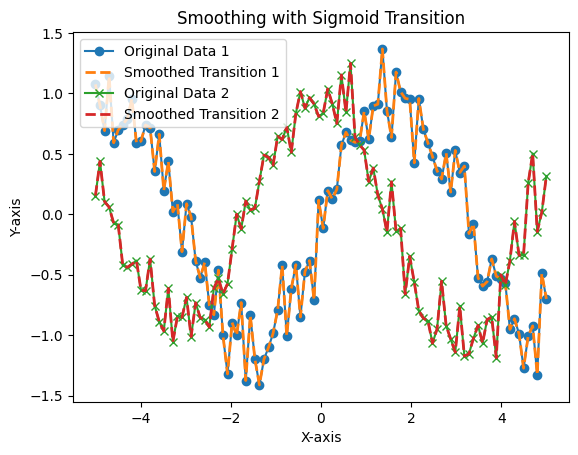

In [120]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x, a, b, c):
    return c / (1.0 + np.exp(-a * (x - b)))

def smooth_transition_functions(x_values, y_values, x_conn, width):
    smoothed_y_values = []
    for i, x in enumerate(x_values):
        t = sigmoid(x, a=1, b=x_conn, c=1)
        smoothed_y = (1 - t) * y_values[i] + t * y_values[i]
        smoothed_y_values.append(smoothed_y)
    return smoothed_y_values

# Example data
xdata = np.linspace(-5, 5, 100)
ydata1 = np.sin(xdata) + 0.2 * np.random.normal(size=len(xdata))
ydata2 = np.cos(xdata) + 0.2 * np.random.normal(size=len(xdata))

# Parameters for the transition
x_conn = 0.5  # Connection point
width = 1.0   # Width of the transition

# Calculate smoothed y values for both functions
smoothed_y1 = smooth_transition_functions(xdata, ydata1, x_conn, width)
smoothed_y2 = smooth_transition_functions(xdata, ydata2, x_conn, width)

# Plot the original data and the smoothed transitions
plt.plot(xdata, ydata1, label="Original Data 1", marker="o")
plt.plot(xdata, smoothed_y1, label="Smoothed Transition 1", linestyle="--", linewidth=2)

plt.plot(xdata, ydata2, label="Original Data 2", marker="x")
plt.plot(xdata, smoothed_y2, label="Smoothed Transition 2", linestyle="--", linewidth=2)

plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Smoothing with Sigmoid Transition")
plt.show()

In [19]:

# 
# for element in vsl_total:
#     interval = element['interval']
#     fitting_function_str = element['fitting_function']
#     # Adjust the number of points as needed
#     x = np.linspace(interval[0], interval[1], 400)
#     y = fitting_function(x)
#     
#     for i in range(1, len(funcs)):
#         # Compute the transition values
#         t = transition(x,interval[1])
# 
#         # Update the combined function
#         y = (1 - t) * y + t * y_values[i]
#         
#     if fitting_function_str in colors.keys():
#         ax.plot(x, y, '--',linewidth=3, label=f'Interval vsl: [{round(interval[0]), round(interval[1])}]',color=colors[fitting_function_str])
#     else:
#         ax.plot(x, y, '--',linewidth=3, label=f'Interval vsl: [{round(interval[0]), round(interval[1])}]')
#         color = ax.get_lines()[-1].get_color()
#         colors[fitting_function_str] = color
        
    
# Create the graph for novsl
# colors = {}
# for element in novsl_total:
#     interval = element['interval']
#     fitting_function_str = element['fitting_function']
# 
#     # Convert the string into a function
#     terms = re.findall(
#         r'([+-]?\s*\d+\.?\d*(?:e[+-]?\d+)?)(x\^\d+)?', fitting_function_str.replace(' ', ''))
#     coefficients = [0] * 10  # Initialize a list of 10 zeros
#     for term in terms:
#         coef = float(term[0])
#         if term[1]:  # If there is an 'x' term
#             exponent = int(term[1][2:])  # Get the exponent
#             while len(coefficients) <= exponent:  # Expand the list if needed
#                 coefficients.append(0)
#             # Assign the coefficient to the corresponding position in the list
#             coefficients[exponent] = coef
#         else:  # If there is no 'x' term, it's the constant term
#             coefficients[0] = coef
#     # Reverse the list to match the order expected by np.poly1d
#     fitting_function = np.poly1d(coefficients[::-1])
# 
#     # Adjust the number of points as needed
#     x = np.linspace(interval[0], interval[1], 400)
#     y = fitting_function(x)
#     if fitting_function_str in colors.keys():
#         ax.plot(x, y, '-',linewidth=2, label=f'Interval novsl: [{round(interval[0]), round(interval[1])}]',color=colors[fitting_function_str])
#     else:
#         ax.plot(x, y, '-',linewidth=2, label=f'Interval novsl: [{round(interval[0]), round(interval[1])}]')
#         color = ax.get_lines()[-1].get_color()
#         colors[fitting_function_str] = color
#     #plt.ylim([-100, 100]
#     # ax.set_xticks(np.arange(*ax.get_xlim(),(ax.get_xlim()[1] - ax.get_xlim()[0]) / 20))
#     print(fitting_function_str)

# for element in remaining_unfit_intervals:
#     ax.axvspan(*element['interval'], color='gray',
#                alpha=0.3, label='unfit Interval')
# plt.title("Overall fitted functions for VSL and NOVSL")
# plt.xlabel('Traffic volume [veh/h]')
# plt.ylabel('TTS [veh$\cdot$h]')
# plt.legend()
# plt.savefig(f"Total_fitted_functions-{timestamp}.pdf", format='pdf')
# print(funcs)
# 
# def transition(x, x_conn, width=1):
#     return 1 / (1 + np.exp(-2/width*(x - x_conn)))



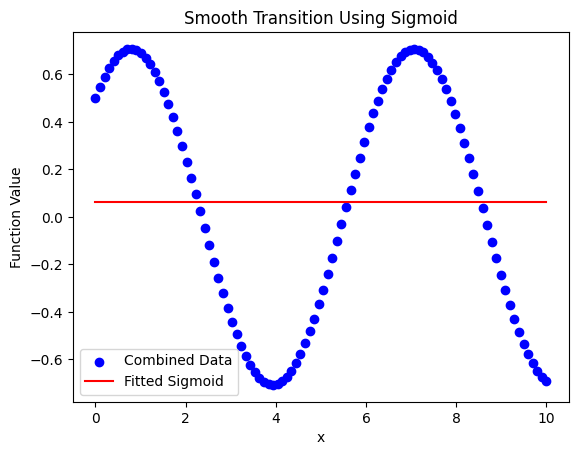

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the sigmoid function
def sigmoid(x, k, x0):
    return 1.0 / (1.0 + np.exp(-k * (x - x0)))

# Generate example data (replace with your actual data)
x_data = np.linspace(0, 10, 100)
y1_data = np.sin(x_data)  # First function
y2_data = np.cos(x_data)  # Second function

# Combine the data (e.g., average or interpolate)
combined_data = (y1_data + y2_data) / 2

# Fit the sigmoid to the combined data
params, covariance = curve_fit(sigmoid, x_data, combined_data, p0=[1, 5],maxfev=1000)

# Plot the original data and the fitted sigmoid
plt.scatter(x_data, combined_data, label='Combined Data', color='blue')
plt.plot(x_data, sigmoid(x_data, *params), label='Fitted Sigmoid', color='red')
plt.xlabel('x')
plt.ylabel('Function Value')
plt.title('Smooth Transition Using Sigmoid')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


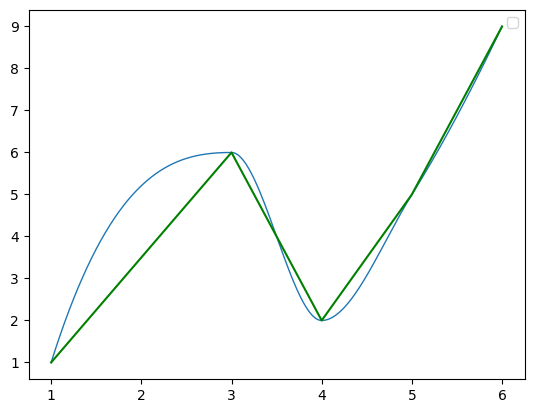

In [29]:
from scipy.interpolate import pchip

x = np.array([1, 3, 4, 5, 6])
y = np.array([1, 6, 2, 5, 9])

# Create a finer grid
x_smooth = np.linspace(x.min(), x[-1], 500)
y_smooth = pchip(x, y)(x_smooth)

plt.plot(x_smooth, y_smooth, lw=1)
plt.plot(x,y,'g-')
plt.legend()
plt.show()

In [88]:
for element in vsl_total:
    interval = element['interval']
    fitting_function_str = element['fitting_function']
    print(element["fit_points"][0])
    


(2600.0, 346.13889)
(2800.0, 378.27778)
(2944.61538, 400.51389)
(3625.0, 604.84722)
(3781.53846, 730.69444)


In [4]:
vsl_total

In [8]:
novsl_total